# 线性逻辑回归示例
* 熟悉nummpy
* 单变量线性回归
* 梯度下降

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')


In [14]:
def warmUpExercise():
    return np.identity(5)
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# 单变量线性回归

In [15]:
data = np.loadtxt('linear_regression_data1.txt', delimiter=',')
"""
np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等，类似于pandas中的concat()。
np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等，类似于pandas中的merge()。
"""
X = np.c_[np.ones(data.shape[0]), data[:,0]]
y = np.c_[data[:,1]]

Text(0, 0.5, 'Profit in $10,000')

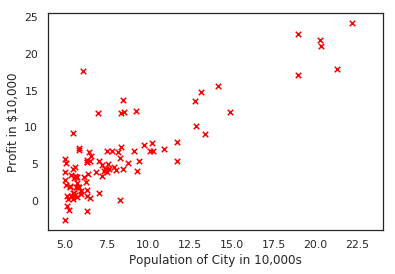

In [16]:
# 画出散点图
# plt.scatter(data[:,0], data[:,1], s=30, c='r', marker='x', linewidths=1)
# x轴代表是人口数，y轴类似GDP
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')

# 梯度下降

## 线性回归计算损失函数
* 找到最好的的权重/参数[θ0,θ1,θ2,....,θn]=θ
* 把x到y的映射函数f记作h(θ)
![WX20181201-171852@2x.png](https://i.loli.net/2018/12/01/5c025209c1c93.png)

In [17]:
# 计算损失函数
def computerCost(X,y, theta=[[0],[0]]):
    m = y.size
    h = X.dot(theta)
    J = 1.0/(2*m)*(np.sum(np.square(h-y)))
    return J

In [18]:
computerCost(X,y)

32.072733877455676

In [19]:
# 手写 梯度下降
def gradientDescent(X,y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha * (1.0/m)*(X.T.dot(h-y))
        J_history[iter] = computerCost(X,y, theta)
    return(theta, J_history)

theta:  [-3.63029144  1.16636235]


Text(0.5, 0, 'Iterations')

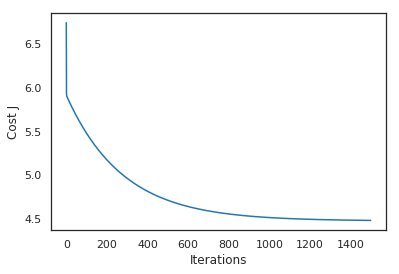

In [20]:
# 画出每一次迭代和损失函数变化
theta, Cost_J = gradientDescent(X,y)
print('theta: ', theta.ravel())
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations')

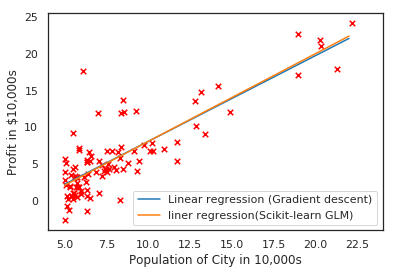

In [21]:
xx = np.arange(5,23)
yy = theta[0] + theta[1]*xx

# 画出自己写的线性回归梯度下降收敛的情况
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx, yy, label='Linear regression (Gradient descent)')

# 和Scikit-learn 中的线性回归对比
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_ + regr.coef_ * xx, label= 'liner regression(Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4)


In [22]:
# 预测一下人口为 35000 和 70000 的城市结果
print(theta.T.dot([1, 3.5]) * 10000)
print(theta.T.dot([1, 7]) * 10000)

[4519.7678677]
[45342.45012945]
